In [49]:
#Imports
import numpy as np
import pandas as pd
import os
import argparse
import time
import matplotlib.pyplot as plt
%matplotlib inline


# Caffe and selective search
import caffe
import selective_search_ijcv_with_python as selective_search

# Images
MODEL_FILE = '/home/ubuntu/ObjectDetector/caffe/models/bvlc_reference_rcnn_ilsvrc13/deploy.prototxt'
PRETRAINED = '/home/ubuntu/ObjectDetector/caffe/models/bvlc_reference_rcnn_ilsvrc13/bvlc_reference_rcnn_ilsvrc13.caffemodel'
INPUT_IMAGE = ['/home/ubuntu/ObjectDetector/caffe/examples/images/cat.jpg']


In [50]:
# Selective Search
window_lists = selective_search.get_windows(
            INPUT_IMAGE,
            cmd='selective_search_rcnn')

print window_lists

selective_search_rcnn({'/home/tox/Research/projects/2015s-deep-learning/caffe/examples/images/cat.jpg'}, '/tmp/tmpW9qVr8.mat')
[array([[   0.  ,    0.  ,  360.04,  480.04],
       [  16.32,  167.04,  342.76,  346.6 ],
       [  21.12,   14.4 ,  360.04,  480.04],
       ..., 
       [  65.28,  355.2 ,  114.28,  422.44],
       [   0.  ,    0.  ,   33.64,   43.24],
       [  41.28,  249.6 ,   61.48,  289.96]])]


In [51]:
for window in enumerate(window_lists):
    print window       

(0, array([[   0.  ,    0.  ,  360.04,  480.04],
       [  16.32,  167.04,  342.76,  346.6 ],
       [  21.12,   14.4 ,  360.04,  480.04],
       ..., 
       [  65.28,  355.2 ,  114.28,  422.44],
       [   0.  ,    0.  ,   33.64,   43.24],
       [  41.28,  249.6 ,   61.48,  289.96]]))


In [52]:
#Caffe
caffe.set_mode_cpu()

#Detector
detector = caffe.Detector(MODEL_FILE, PRETRAINED, mean=None,
            input_scale=None, raw_scale=255,
            channel_swap=None,
            context_pad=16)

In [53]:
# Load image
image = caffe.io.load_image(INPUT_IMAGE[0]).astype(np.float32)

# Crop it
windows_tried = 1000;
count = 0;

window_inputs = []
for window in window_lists[0]:
    count = count + 1;
    window_inputs.append(detector.crop(image, window)); 
    if(count == windows_tried):
        break;

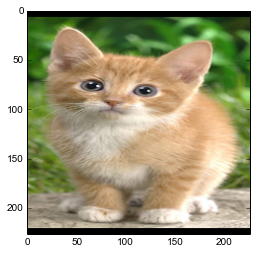

In [54]:
plt.imshow(window_inputs[1])

In [55]:
# Preprocess
in_ = detector.inputs[0]
caffe_in = np.zeros((len(window_inputs), window_inputs[0].shape[2])
                            + detector.blobs[in_].data.shape[2:],
                            dtype=np.float32)

for ix, window_in in enumerate(window_inputs):
    caffe_in[ix] = detector.transformer.preprocess(in_, window_in)

print 'Size of input: ',len(caffe_in)

Size of input:  1000


In [56]:
# Detect
start_time = time.time();
out = detector.forward_all(**{in_: caffe_in})
time_taken = time.time() - start_time;
print("Time taken is: {}".format(time_taken));

Time taken is: 107.47832489


In [57]:
prediction = out[detector.outputs[0]];

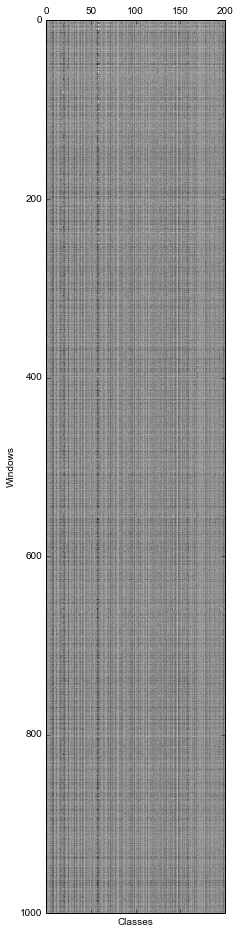

In [58]:
plt.gray()
plt.matshow(prediction)
plt.xlabel('Classes')
plt.ylabel('Windows')

In [59]:
max_value = -1000000;
count = 0;
max_s = out[detector.outputs[0]].max(1)
for window in out[detector.outputs[0]]:    
    max_window_val = max(window);
    if max_window_val>max_value:
        max_value = max_window_val;
        bbox_index = count;
        class_index = window.tolist().index(max_window_val);
    count = count + 1;       
print 'Class Index: ', class_index, ' Bbox Index: ', bbox_index, 'Max Value: ', max_value

Class Index:  58  Bbox Index:  10 Max Value:  1.4132


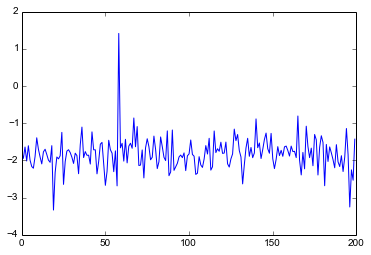

In [60]:
plt.plot(prediction[bbox_index,:])

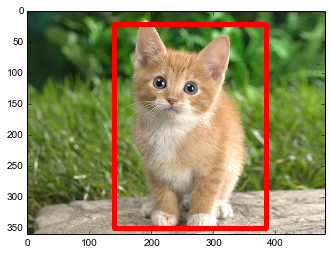

In [61]:
# Show top detection in red, second-best top detection in blue.
im = plt.imread(INPUT_IMAGE[0])
plt.imshow(im)
currentAxis = plt.gca()

bbox = window_lists[0][bbox_index];
coords = (bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0];
currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor='r', linewidth=5))

In [38]:
bbox

array([   8.658,  194.324,  159.73 ,  353.092])